In [1]:
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
import torch.optim as optim
import random
from collections import deque
from back_tester import * 
from deep_q_learning_improved import *
from collections import Counter


/Users/alex_1/anaconda3/lib/python3.11/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


# Fix seed for reproducibility
---

In [2]:
# ─── FIX RANDOM SEEDS ───────────────────────────────────────────────────────────
SEED = 42
random.seed(SEED) #Sets the seed for Python’s built-in random module.
np.random.seed(SEED) #Sets the seed for NumPy’s random number generator.
torch.manual_seed(SEED) #Sets the seed for PyTorch CPU operations.
# if you’re using CUDA:
if torch.cuda.is_available():
    torch.cuda.manual_seed(SEED)
    torch.cuda.manual_seed_all(SEED)
    # make CuDNN deterministic (may slow you down a bit)
    torch.backends.cudnn.deterministic   = True
    torch.backends.cudnn.benchmark       = False
# ────────────────────────────────────────────────────────────────────────────────



# Load data
---

* ## In sample data

In [3]:
#Data
prices = pd.read_csv('tardis_data/final_in_sample_dataset/final_in_sample_dataset_5min_2024.csv', index_col=0, parse_dates=True)
prices = prices[['MANAUSDT_2024_5m', 'SANDUSDT_2024_5m']]

#Filter for AXSUSDT_2024_5m ~ SANDUSDT_2024_5m
# prices = prices[['AXSUSDT_2024_5m', 'SANDUSDT_2024_5m']]
prices

,MANAUSDT_2024_5m,SANDUSDT_2024_5m
timestamp,,
2024-01-01 00:00:00,0.5239,0.6006
2024-01-01 00:05:00,0.5228,0.5971
2024-01-01 00:10:00,0.5228,0.5979
2024-01-01 00:15:00,0.5213,0.5941
2024-01-01 00:20:00,0.5218,0.5947
...,...,...
2024-06-29 23:20:00,0.3312,0.3263
2024-06-29 23:35:00,0.3311,0.3261
2024-06-29 23:40:00,0.3307,0.3259


* ## Out of sample data

In [4]:
prices_out_of_sample = pd.read_csv('tardis_data/final_out_of_sample_dataset_5min/final_out_of_sample_dataset_5min.csv', index_col=0, parse_dates=True)

#Filter for MANAUSDT_2024_5m ~ SANDUSDT_2024_5m
prices_out_of_sample = prices_out_of_sample[['MANAUSDT_2024_5m', 'SANDUSDT_2024_5m']]
prices_out_of_sample

,MANAUSDT_2024_5m,SANDUSDT_2024_5m
timestamp,,
2024-07-01 00:00:00,0.3387,0.3304
2024-07-01 00:05:00,0.3387,0.3304
2024-07-01 00:10:00,0.3392,0.3310
2024-07-01 00:15:00,0.3389,0.3311
2024-07-01 00:20:00,0.3391,0.3313
...,...,...
2024-09-29 23:35:00,0.3205,0.2892
2024-09-29 23:40:00,0.3211,0.2890
2024-09-29 23:45:00,0.3220,0.2904


# EDD
---

In [5]:
# # Load your precomputed z-score spreads and raw prices as NumPy arrays

# window_size = 288 # It seems like as this increases, the percent absolute delta beta error decreases!


# sym1, sym2 = prices.columns
# S1 = prices[sym1]
# S2 = prices[sym2]

# print("Computing spread series and beta series...")
# # Compute the spread series and beta_series 
# spread_series, beta_series, alpha_series = compute_spread_series(S1, S2, window_size)
# #print(f"Hedge ratio (beta) for {sym1} ~ {sym2}: {beta:.4f}")

# # Compute rolling z-score using the provided helper function.
# zscore_series, rolling_mean, rolling_std = compute_rolling_zscore(spread_series, window_size)

# #Drop NaN values from zscore_series
# zscore_series = zscore_series.dropna()

# #Esnure prices and beta_series are aligned with zscore_series after dropping NaN values in the zscore_series
# prices = prices.loc[zscore_series.index]
# beta_series = beta_series.loc[zscore_series.index]


In [6]:
# # 1) Prepare a DataFrame to collect per‐cycle features

# spreads = zscore_series


# records = []
# for period, month_df in spreads.groupby(spreads.index.to_period("M")):
#     # slice out that month’s data
#     z = spreads[spreads.index.to_period("M") == period]
#     p = prices.loc[z.index]
#     b = beta_series.loc[z.index]

#     # build a mini‐env just to extract cycles
#     env = PairsTradingEnv(z, p, b, initial_capital=1.0, tx_cost=0.0, entry_stop_pairs=[(1, 2), (2, 3), (3, 4)], eval_mode=True) #Make eval mode false for now
#     env.create_cycles(min_threshold=1.0, tol=0.10)

#     # for each cycle, grab summary stats
#     for cycle in env.spread_cycles:
#         records.append({
#             "month": str(period),
#             "entry_z": cycle.iloc[0],
#             "cycle_mean": cycle.mean(),
#             "cycle_std": cycle.std(),
#             "cycle_length": len(cycle),
#             "cycle_min": cycle.min(),
#             "cycle_max": cycle.max(),
#             "Absolute max": max(cycle.max(), abs(cycle.min())),
#         })

# df_cycles = pd.DataFrame(records)

In [7]:
# df_cycles

In [8]:

# # 2) Look at how entry_z distributions shift month→month
# plt.figure(figsize=(10,6))
# df_cycles.boxplot(column="entry_z", by="month", rot=45)
# plt.title("Distribution of Cycle Entry Z‐Scores by Month")
# plt.suptitle(""); plt.ylabel("Entry Z-Score")
# plt.tight_layout()
# plt.show()

# # 3) Similarly you can do cycle_length, cycle_std, etc.
# for feat in ["cycle_length","cycle_std","cycle_min","cycle_max"]:
#     plt.figure(figsize=(10,4))
#     df_cycles.boxplot(column=feat, by="month", rot=45)
#     plt.title(f"{feat} by Month")
#     plt.suptitle(""); plt.ylabel(feat)
#     plt.tight_layout()
#     plt.show()

# # 4) Or even a heatmap of mean/std per month
# summary = df_cycles.groupby("month")[["entry_z","cycle_length","cycle_std"]].agg(["mean","std"])
# print(summary)


* ## Training set

---

In [9]:

#prices_train = prices.loc['2024-01-01 00:00:00':'2024-04-30 23:55:00'] #January training data

prices_train = prices.loc['2024-01-01 00:00:00':'2024-05-30 23:55:00'] #January training data

#Only use the first month of prices for now
# start_date = pd.to_datetime('2024-01-01 00:00:00')
# end_date = pd.to_datetime('2024-01-31 23:55:00') 

#prices = prices.loc[start_date:end_date] # 2880 rows = 1 month of 5-minute data

#Params for spread calculation
window_size = 288 # It seems like as this increases, the percent absolute delta beta error decreases!

# Load your precomputed z-score spreads and raw prices as NumPy arrays
sym1_train, sym2_train = prices_train.columns
S1_train = prices_train[sym1_train]
S2_train = prices_train[sym2_train]

print("Computing spread series and beta series...")
# Compute the spread series and beta_series 
spread_series_train, beta_series_train, alpha_series_train = compute_spread_series(S1_train, S2_train, window_size)
#print(f"Hedge ratio (beta) for {sym1} ~ {sym2}: {beta:.4f}")

# Compute rolling z-score using the provided helper function.
zscore_series_train, rolling_mean_train, rolling_std_train = compute_rolling_zscore(spread_series_train, window_size)

#Drop NaN values from zscore_series
zscore_series_train = zscore_series_train.dropna()

#Esnure prices and beta_series are aligned with zscore_series after dropping NaN values in the zscore_series
prices_train = prices_train.loc[zscore_series_train.index]
beta_series_train = beta_series_train.loc[zscore_series_train.index]


Computing spread series and beta series...


In [10]:
prices_train

,MANAUSDT_2024_5m,SANDUSDT_2024_5m
timestamp,,
2024-01-03 00:50:00,0.5315,0.5883
2024-01-03 00:55:00,0.5323,0.5892
2024-01-03 01:00:00,0.5331,0.5904
2024-01-03 01:05:00,0.5327,0.5897
2024-01-03 01:10:00,0.5323,0.5899
...,...,...
2024-05-30 23:35:00,0.4454,0.4386
2024-05-30 23:40:00,0.4452,0.4386
2024-05-30 23:45:00,0.4457,0.4389


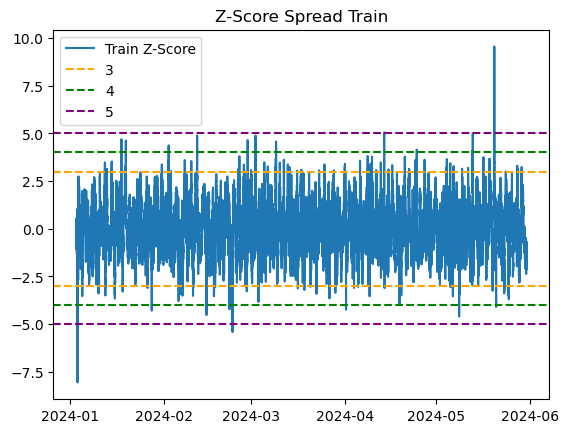

In [11]:
plt.plot(zscore_series_train, label='Train Z-Score')
plt.axhline(3, color='orange', linestyle='--', label='3')
plt.axhline(-3, color='orange', linestyle='--')
plt.axhline(4, color='g', linestyle='--', label='4')
plt.axhline(-4, color='g', linestyle='--',)
plt.axhline(5, color='purple', linestyle='--', label='5')
plt.axhline(-5, color='purple', linestyle='--')
plt.title('Z-Score Spread Train')
plt.legend()

---

* ## Validation set

---

In [12]:

#prices_val = prices.loc['2024-05-01 00:00:00':'2024-05-31 23:55:00'] #May val data
prices_val = prices.loc['2024-06-01 00:00:00':'2024-06-30 23:55:00'] #May val data


#Only use the first month of prices for now
# start_date = pd.to_datetime('2024-01-01 00:00:00')
# end_date = pd.to_datetime('2024-01-31 23:55:00') 

#prices = prices.loc[start_date:end_date] # 2880 rows = 1 month of 5-minute data

#Params for spread calculation
window_size = 288 # It seems like as this increases, the percent absolute delta beta error decreases!

# Load your precomputed z-score spreads and raw prices as NumPy arrays
sym1_val, sym2_val = prices_val.columns
S1_val = prices_val[sym1_val]
S2_val = prices_val[sym2_val]

print("Computing spread series and beta series...")
# Compute the spread series and beta_series 
spread_series_val, beta_series_val, alpha_series_val = compute_spread_series(S1_val, S2_val, window_size)
#print(f"Hedge ratio (beta) for {sym1} ~ {sym2}: {beta:.4f}")

# Compute rolling z-score using the provided helper function.
zscore_series_val, rolling_mean_val, rolling_std_val = compute_rolling_zscore(spread_series_val, window_size)

#Drop NaN values from zscore_series
zscore_series_val = zscore_series_val.dropna()

#Esnure prices and beta_series are aligned with zscore_series after dropping NaN values in the zscore_series
prices_val = prices_val.loc[zscore_series_val.index]
beta_series_val = beta_series_val.loc[zscore_series_val.index]


Computing spread series and beta series...


In [13]:
prices_val

,MANAUSDT_2024_5m,SANDUSDT_2024_5m
timestamp,,
2024-06-03 01:15:00,0.4433,0.4378
2024-06-03 01:20:00,0.4458,0.4400
2024-06-03 01:25:00,0.4464,0.4407
2024-06-03 01:30:00,0.4474,0.4424
2024-06-03 01:35:00,0.4468,0.4416
...,...,...
2024-06-29 23:20:00,0.3312,0.3263
2024-06-29 23:35:00,0.3311,0.3261
2024-06-29 23:40:00,0.3307,0.3259


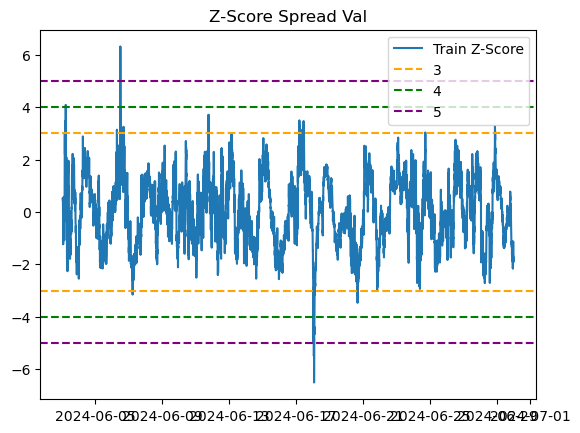

In [14]:
plt.plot(zscore_series_val, label='Train Z-Score')
plt.axhline(3, color='orange', linestyle='--', label='3')
plt.axhline(-3, color='orange', linestyle='--')
plt.axhline(4, color='g', linestyle='--', label='4')
plt.axhline(-4, color='g', linestyle='--',)
plt.axhline(5, color='purple', linestyle='--', label='5')
plt.axhline(-5, color='purple', linestyle='--')
plt.title('Z-Score Spread Val')
plt.legend()

---

* ## Test set

---

In [15]:

#prices_test = prices.loc['2024-06-01 00:00:00':'2024-06-29 23:55:00']
#prices_test = prices.loc['2024-06-01 00:00:00':'2024-06-30 23:55:00']

#prices_test = prices.loc['2024-05-01 00:00:00':'2024-06-30 23:55:00'] #May and June test data

#Test set is the out-of-sample data
prices_test = prices_out_of_sample

#Only use the first month of prices for now
# start_date = pd.to_datetime('2024-01-01 00:00:00')
# end_date = pd.to_datetime('2024-01-31 23:55:00') 

#prices = prices.loc[start_date:end_date] # 2880 rows = 1 month of 5-minute data

#Params for spread calculation
window_size = 288 # It seems like as this increases, the percent absolute delta beta error decreases!

# Load your precomputed z-score spreads and raw prices as NumPy arrays
sym1_test, sym2_test = prices_test.columns
S1_test = prices_test[sym1_test]
S2_test = prices_test[sym2_test]

print("Computing spread series and beta series...")
# Compute the spread series and beta_series 
spread_series_test, beta_series_test, alpha_series_test = compute_spread_series(S1_test, S2_test, window_size)
#print(f"Hedge ratio (beta) for {sym1} ~ {sym2}: {beta:.4f}")

# Compute rolling z-score using the provided helper function.
zscore_series_test, rolling_mean_test, rolling_std_test = compute_rolling_zscore(spread_series_test, window_size)

#Drop NaN values from zscore_series
zscore_series_test = zscore_series_test.dropna()

#Esnure prices and beta_series are aligned with zscore_series after dropping NaN values in the zscore_series
prices_test = prices_test.loc[zscore_series_test.index]
beta_series_test = beta_series_test.loc[zscore_series_test.index]


Computing spread series and beta series...


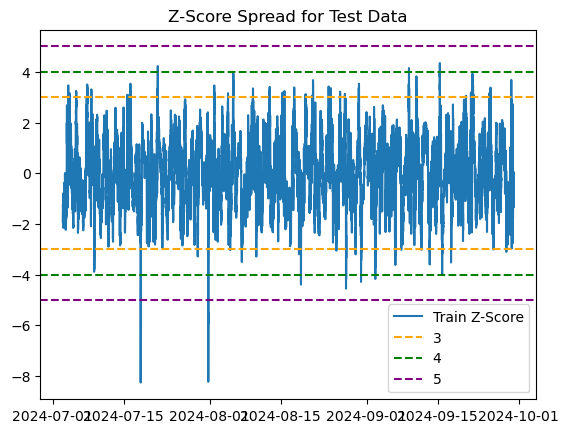

In [16]:
plt.plot(zscore_series_test, label='Train Z-Score')
plt.axhline(3, color='orange', linestyle='--', label='3')
plt.axhline(-3, color='orange', linestyle='--')
plt.axhline(4, color='g', linestyle='--', label='4')
plt.axhline(-4, color='g', linestyle='--',)
plt.axhline(5, color='purple', linestyle='--', label='5')
plt.axhline(-5, color='purple', linestyle='--')
plt.title('Z-Score Spread for Test Data')
plt.legend()

---

# Train agent
---

In [17]:

print("Training DQN agent...")
# Define your discrete threshold pairs: [(entry1, stop1), (entry2, stop2), ...]
entry_stop_pairs = [(1, 2), (2, 3),(3, 4),(4,5)]
# Training parameters
initial_capital = 10_000
tx_cost = 0

# online_net, replay_buffer,epoch_loss_history, reward_history,validation_reward_history,training_metrics = train_dqn(
#                                                                                         zscore_series_train, 
#                                                                                         prices_train, 
#                                                                                         beta_series_train,
#                                                                                         zscore_series_val,
#                                                                                         prices_val,
#                                                                                         beta_series_val,
#                                                                                         initial_capital,
#                                                                                         tx_cost,
#                                                                                         entry_stop_pairs, 
#                                                                                         num_epochs=220,
#                                                                                         batch_size=32,
#                                                                                         gamma = 0.99,
#                                                                                         lr = 0.001,
#                                                                                         epsilon_start = 1,
#                                                                                         epsilon_end = 0.01,
#                                                                                         epsilon_decay = 0.995,
#                                                                                         replay_capacity = 1000,
#                                                                                         target_update_freq = 10,
#                                                                                         hidden_dim = 64,
#                                                                                         tau= 0.01,                                           
#                                                                                         )

# # Save the trained model
# torch.save(online_net.state_dict(), 'dqn_model.pth')


Training DQN agent...


In [18]:
n_trials = 10
num_epochs = 100

best_reward, best_params = optimize_hyperparameters(
    zscore_series_train, prices_train, beta_series_train,
    zscore_series_val,   prices_val,   beta_series_val,
    initial_capital, tx_cost,
    entry_stop_pairs,
    n_trials,
    num_epochs
)

[I 2025-05-25 20:30:42,128] A new study created in memory with name: no-name-b910c820-0d21-45a8-81cb-3f85fad20ffa


  0%|          | 0/10 [00:00<?, ?it/s]

/Users/alex_1/Documents/GitHub/PairsTrading/deep_q_learning_improved.py:646: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  lr     = trial.suggest_loguniform("lr", 1e-4, 1e-2)


[I 2025-05-25 20:32:18,223] Trial 0 finished with value: -0.12641509433962264 and parameters: {'lr': 0.0001138791078818061, 'batch_size': 32, 'hidden_dim': 64, 'gamma': 0.9813681259248042, 'epsilon_decay': 0.9907110344617138, 'tau': 0.0054207289167977355}. Best is trial 0 with value: -0.12641509433962264.


/Users/alex_1/Documents/GitHub/PairsTrading/deep_q_learning_improved.py:646: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  lr     = trial.suggest_loguniform("lr", 1e-4, 1e-2)


[I 2025-05-25 20:34:08,813] Trial 1 finished with value: 0.041509433962264156 and parameters: {'lr': 0.00015209693792887506, 'batch_size': 64, 'hidden_dim': 128, 'gamma': 0.9619238391781989, 'epsilon_decay': 0.9929092018547496, 'tau': 0.003380595474449959}. Best is trial 0 with value: -0.12641509433962264.
[I 2025-05-25 20:35:36,088] Trial 2 finished with value: -0.13584905660377358 and parameters: {'lr': 0.00014371883665483692, 'batch_size': 32, 'hidden_dim': 32, 'gamma': 0.955797204005367, 'epsilon_decay': 0.9834750980620889, 'tau': 0.006756881556235021}. Best is trial 2 with value: -0.13584905660377358.
[I 2025-05-25 20:37:05,496] Trial 3 finished with value: -0.12075471698113208 and parameters: {'lr': 0.000110723293394501, 'batch_size': 32, 'hidden_dim': 64, 'gamma': 0.9922108809246957, 'epsilon_decay': 0.9802658870649569, 'tau': 0.0013798800284375735}. Best is trial 2 with value: -0.13584905660377358.
[I 2025-05-25 20:38:35,122] Trial 4 finished with value: 0.05660377358490567 and

In [19]:
lr_best, batch_size_best, hidden_dim_best, gamma_best, epsilon_decay_best, tau_best = best_params.values()

print(f"Best reward: {best_reward}")
print(f"Best hyperparameters: {best_params}")
# Train the DQN agent with the best hyperparameters

Best reward: 0.13584905660377358
Best hyperparameters: {'lr': 0.00014371883665483692, 'batch_size': 32, 'hidden_dim': 32, 'gamma': 0.955797204005367, 'epsilon_decay': 0.9834750980620889, 'tau': 0.006756881556235021}


In [38]:

online_net, replay_buffer,epoch_loss_history, reward_history,validation_reward_history,training_metrics = train_dqn(
                                                                                        zscore_series_train, 
                                                                                        prices_train, 
                                                                                        beta_series_train,
                                                                                        zscore_series_val,
                                                                                        prices_val,
                                                                                        beta_series_val,
                                                                                        initial_capital,
                                                                                        tx_cost,
                                                                                        entry_stop_pairs, 
                                                                                        num_epochs=num_epochs,
                                                                                        batch_size=batch_size_best,
                                                                                        gamma = gamma_best,
                                                                                        lr = lr_best,
                                                                                        epsilon_start = 1,
                                                                                        epsilon_end = 0.01,
                                                                                        epsilon_decay = epsilon_decay_best,
                                                                                        replay_capacity = 1000,
                                                                                        target_update_freq = 10,
                                                                                        hidden_dim = hidden_dim_best,
                                                                                        tau= tau_best,                                           
                                                                                        )

# Save the trained model
torch.save(online_net.state_dict(), 'dqn_model.pth')

In [21]:
entry_stop_pairs_extended = [(1, 2), (2, 3),(3, 4),(4,5),(5,6),(6,7),(7,8),(8,9),(9,10)]

# Best thresholds
---

Percentage Counts
---------------------
[59.907834101382484, 0.15360983102918588, 25.34562211981567, 11.827956989247312, 2.3041474654377883, 0.30721966205837176, 0.15360983102918588]
Numerical counts
---------------------
[390, 1, 165, 77, 15, 2, 1]


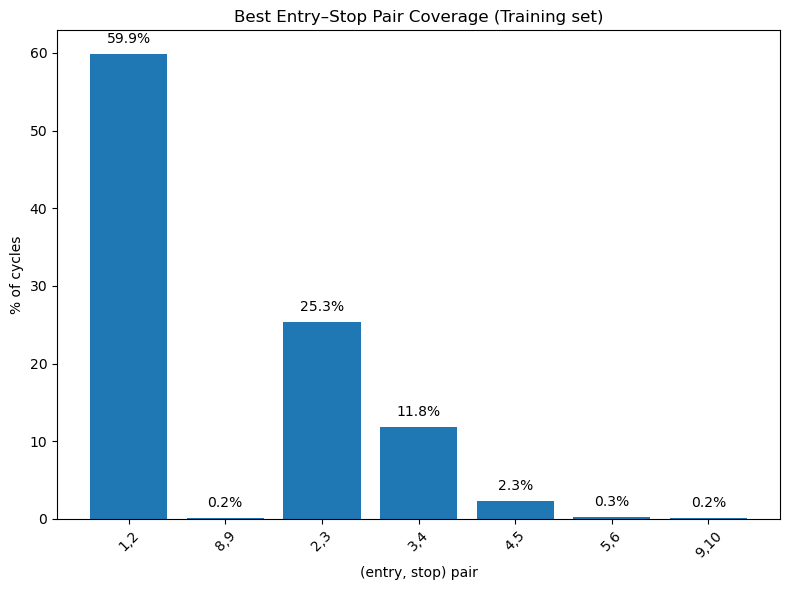

In [39]:
env = PairsTradingEnv(zscore_series_train, prices_train, beta_series_train, initial_capital, tx_cost, entry_stop_pairs_extended, eval_mode=True) #keep eval_mode=True so no cylces are removed
best_pairs_train = env.find_best_thresholds()
spread_cycles_train = env.spread_cycles

#best_pairs_train = find_best_thresholds(entry_stop_pairs,zscore_series_train,prices_train,beta_series_train)

# Suppose best_pairs is your list of length N containing either (e,s) or None
counts = Counter(best_pairs_train)   # Now counts[None] is how many cycles had no winning pair
total  = len(best_pairs_train)

# Convert raw counts to percentages
pairs    = list(counts.keys())
percent_train  = [counts[p] / total * 100 for p in pairs]

# Turn None → a string label
labels = [
    "no winner" if p is None else f"{p[0]},{p[1]}"
    for p in pairs
]

zip_object = zip(labels, percent_train)

print("Percentage Counts")
print("---------------------")
print(percent_train)

print("Numerical counts")
print("---------------------")
print([counts[p] for p in pairs])


# Plot
plt.figure(figsize=(8,6))
bars = plt.bar(range(len(labels)), percent_train, tick_label=labels)
plt.ylabel("% of cycles")
plt.xlabel("(entry, stop) pair")

#Add value labels on top of the bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 1, f"{yval:.1f}%", ha='center', va='bottom')
plt.xticks(rotation=45)
plt.title("Best Entry–Stop Pair Coverage (Training set)")

plt.tight_layout()





Percentage Counts
---------------------
[60.747663551401864, 7.476635514018691, 0.9345794392523363, 28.971962616822427, 1.8691588785046727]
Numerical counts
---------------------
[65, 8, 1, 31, 2]


Text(0.5, 1.0, 'Best Entry–Stop Pair Coverage (Validation set))')

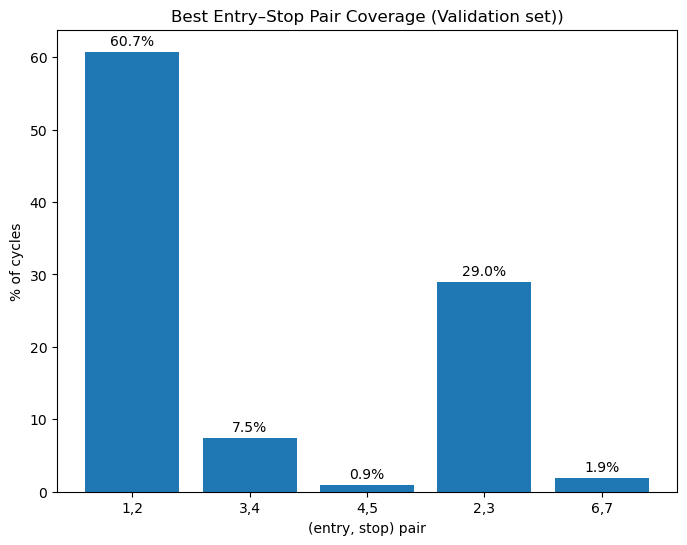

In [40]:
env_val_best = PairsTradingEnv(zscore_series_val, prices_val, beta_series_val, initial_capital, tx_cost, entry_stop_pairs_extended, eval_mode=True)
best_pairs_val = env_val_best.find_best_thresholds()
spread_cycles_val = env_val_best.spread_cycles


# Suppose best_pairs is your list of length N containing either (e,s) or None
counts = Counter(best_pairs_val)   # Now counts[None] is how many cycles had no winning pair
total  = len(best_pairs_val)

# Convert raw counts to percentages
pairs    = list(counts.keys())
percent_val  = [counts[p] / total * 100 for p in pairs]

# Turn None → a string label
labels = [
    "no winner" if p is None else f"{p[0]},{p[1]}"
    for p in pairs
]

print("Percentage Counts")
print("---------------------")
print(percent_val)


print("Numerical counts")
print("---------------------")
print([counts[p] for p in pairs])



# Plot
plt.figure(figsize=(8,6))
bars = plt.bar(range(len(labels)), percent_val, tick_label=labels)

#Add percentage values on top of the bars
for bar, percent in zip(bars, percent_val):
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.5, f"{percent:.1f}%", ha='center', va='bottom')


plt.ylabel("% of cycles")
plt.xlabel("(entry, stop) pair")
plt.title("Best Entry–Stop Pair Coverage (Validation set))")

Percentage Counts
---------------------
[29.289940828402365, 54.73372781065089, 13.313609467455622, 0.591715976331361, 2.0710059171597637]
Numerical counts
---------------------
[99, 185, 45, 2, 7]


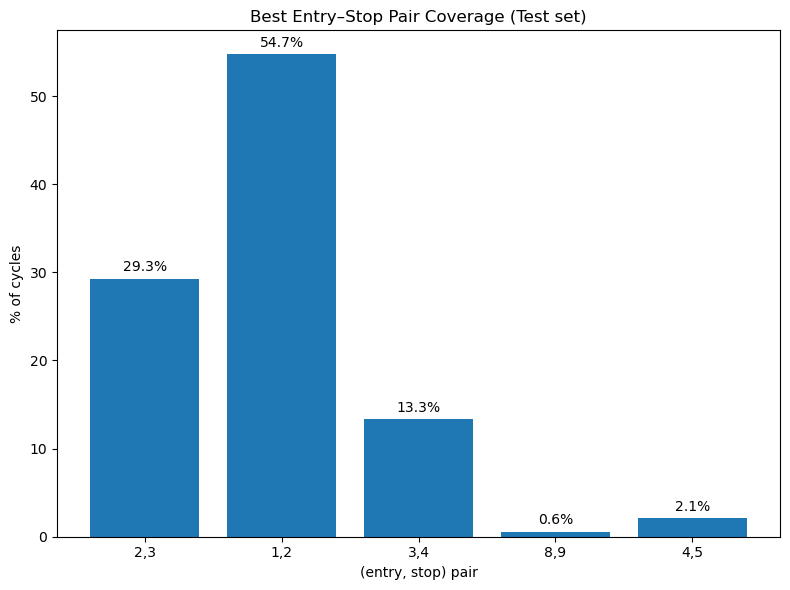

In [41]:
env_test_best = PairsTradingEnv(zscore_series_test, prices_test, beta_series_test, initial_capital, tx_cost, entry_stop_pairs_extended, eval_mode=True)
best_pairs_test = env_test_best.find_best_thresholds()
spread_cycles_test = env_test_best.spread_cycles


# Suppose best_pairs is your list of length N containing either (e,s) or None
counts = Counter(best_pairs_test)   # Now counts[None] is how many cycles had no winning pair
total  = len(best_pairs_test)

# Convert raw counts to percentages
pairs    = list(counts.keys())
percent_test  = [counts[p] / total * 100 for p in pairs]

# Turn None → a string label
labels = [
    "no winner" if p is None else f"{p[0]},{p[1]}"
    for p in pairs
]

print("Percentage Counts")
print("---------------------")
print(percent_test)


print("Numerical counts")
print("---------------------")
print([counts[p] for p in pairs])



# Plot
plt.figure(figsize=(8,6))
bars = plt.bar(range(len(labels)), percent_test, tick_label=labels)
plt.ylabel("% of cycles")
plt.xlabel("(entry, stop) pair")

#Add percentage text on top of each bar
for bar, percent in zip(bars, percent_test):
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.5, f"{percent:.1f}%", ha='center', va='bottom')
    
plt.title("Best Entry–Stop Pair Coverage (Test set)")
plt.tight_layout()




Text(0.5, 1.0, 'Z-Score Series with Cycles illustration (for training set)')

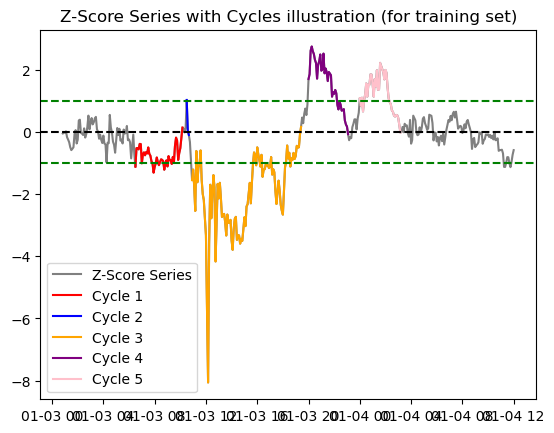

In [42]:
plt.plot(zscore_series_train.iloc[0:420], color = 'grey', label='Z-Score Series')
plt.plot(spread_cycles_train[0], color = 'r', label='Cycle 1')
plt.plot(spread_cycles_train[1], color = 'b' , label='Cycle 2')
plt.plot(spread_cycles_train[2], color = 'orange' , label='Cycle 3')
plt.plot(spread_cycles_train[3], color = 'purple' , label='Cycle 4')
plt.plot(spread_cycles_train[4], color = 'pink' , label='Cycle 5')
plt.axhline(0, color = 'black', linestyle='--')
plt.axhline(1, color = 'green', linestyle='--')
plt.axhline(-1, color = 'green', linestyle='--')
plt.legend(loc='lower left')
plt.title('Z-Score Series with Cycles illustration (for training set)')

# Training performance
---

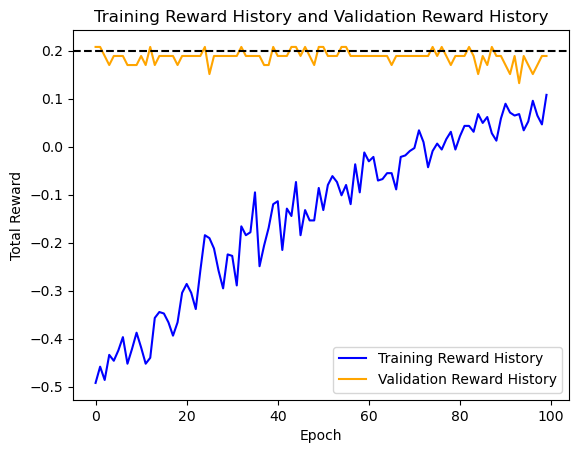

In [43]:
plt.plot(reward_history, color = 'blue', label = 'Training Reward History')
plt.plot(validation_reward_history, color = 'orange', label = 'Validation Reward History')
plt.title('Training Reward History and Validation Reward History')
plt.axhline(0.2, color = 'black', linestyle='--')
plt.xlabel('Epoch')
plt.ylabel('Total Reward')
plt.legend()
plt.show()

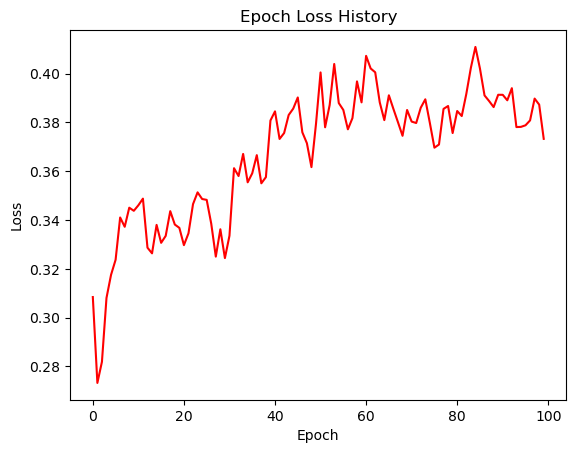

In [44]:
plt.plot(epoch_loss_history, color = 'red')
plt.title('Epoch Loss History')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

Final win rates:  0.5538461538461539
Final loss rates:  0.3
Final forced rates:  0.0
Final none rates:  0.14615384615384616


Text(0.5, 0, 'Epoch')

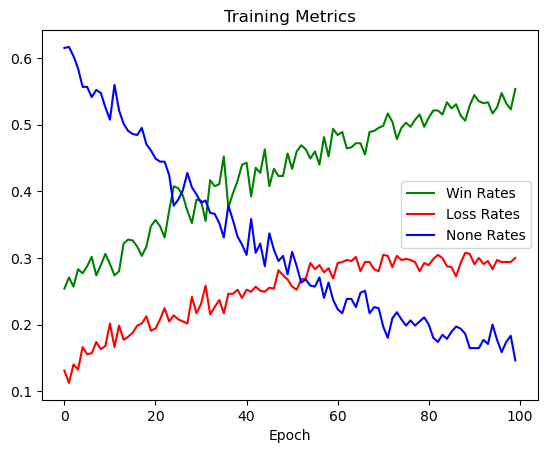

In [45]:
win_rates = training_metrics['win_rates']
loss_rates = training_metrics['loss_rates']
forced_rates = training_metrics['forced_rates']
none_rates = training_metrics['no_trade_rates']

print("Final win rates: ", win_rates[-1])
print("Final loss rates: ", loss_rates[-1])
print("Final forced rates: ", forced_rates[-1])
print("Final none rates: ", none_rates[-1])


plt.plot(win_rates, color = 'green',label = 'Win Rates')
plt.plot(loss_rates, color = 'red', label = 'Loss Rates')
#plt.plot(forced_rates, color = 'orange', label = 'Forced Rates')
plt.plot(none_rates, color = 'blue', label = 'None Rates')

plt.legend()
plt.title('Training Metrics')
plt.xlabel('Epoch') 

# Hyper-Parameter Tuning
---

In [46]:
# best_trial, study = optimize_hyperparameters(
#     zscore_series_train, prices_train, beta_series_train,
#     zscore_series_val,   prices_val,   beta_series_val,
#     initial_capital, tx_cost,
#     entry_stop_pairs,
#     n_trials=50
# )

# Evaluate
---

In [47]:
#Recreate the model and load the saved state_dict
online_net_trained = DQN(input_dim=6, output_dim=len(entry_stop_pairs), hidden_dim=hidden_dim_best)# Load the saved state_dict into the model
online_net_trained.load_state_dict(torch.load('dqn_model.pth'))



/var/folders/rc/tn2ys5g55157vhhlmn0_vfwr0000gq/T/ipykernel_31686/479271446.py:3: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  online_net_trained.load_state_dict(torch.load(

<All keys matched successfully>

In [48]:
tx_cost = 0.000

#define test environment
env_test = PairsTradingEnv(zscore_series_test, prices_test, beta_series_test, initial_capital, tx_cost, entry_stop_pairs, eval_mode=True)

#TEST SET
test_rewards,trade_profits,actions,episodes,test_metrics = evaluate_dqn(
    env_test,
    online_net_trained,
    entry_stop_pairs,
)
print(test_metrics)

#TRAINING SET

# test_rewards,trade_profits,actions,episodes,test_metrics = evaluate_dqn(
#     online_net_trained,
#     zscore_series_train,
#     prices_train,
#     beta_series_train,
#     initial_capital,
#     tx_cost,
#     entry_stop_pairs,
# )
# print(test_metrics)

#VALIDATION SET

# test_rewards,trade_profits,actions,episodes,test_metrics = evaluate_dqn(
#     online_net_trained,
#     zscore_series_val,
#     prices_val,
#     beta_series_val,
#     initial_capital,
#     tx_cost,
#     entry_stop_pairs,
# )
# print(test_metrics)



{'avg_reward': 0.0771513353115727, 'win_rate': 0.5370919881305638, 'loss_rate': 0.41543026706231456, 'forced_rate': 0.002967359050445104, 'no_trade_rate': 0.04451038575667656}


In [49]:
len(trade_profits)  

337

In [50]:
actions_profits_list = zip(actions,trade_profits)
actions_profits_df = pd.DataFrame(actions_profits_list, columns=['Actions', 'Trade Profits'])

#Show all rows
# pd.set_option('display.max_rows', None)=
# pd.set_option('display.max_columns', None)

# actions_profits_df_zeros = actions_profits_df[actions_profits_df['Trade Profits'] > 0]
#actions_profits_df_zeros

actions_profits_df_three_four = actions_profits_df[actions_profits_df['Actions'] == (2, 3)]
actions_profits_df_three_four.tail(50)

,Actions,Trade Profits
3,"(2, 3)",0.000000
10,"(2, 3)",0.000000
15,"(2, 3)",0.000000
56,"(2, 3)",0.000000
93,"(2, 3)",8.529633
97,"(2, 3)",0.000000
98,"(2, 3)",0.000000
117,"(2, 3)",0.000000
120,"(2, 3)",0.000000
156,"(2, 3)",0.000000


Action (1, 2): 91.39%
Action (2, 3): 8.61%


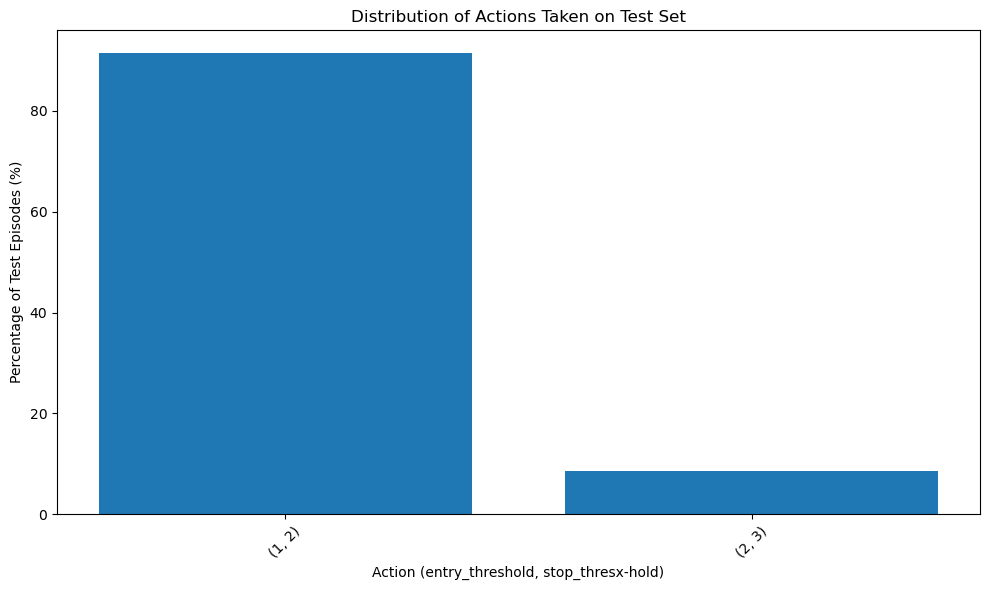

In [51]:
#Count number of each action in the actions list
from collections import Counter

# 1. Count how many times each action appears
counts = Counter(actions)
total = len(actions)

# 2. Compute percentages
actions_sorted = sorted(counts.keys())
percentages = [counts[a] / total * 100 for a in actions_sorted]

actions_percentages_zip = zip(actions_sorted, percentages)

# 3. Print the results
for action, percentage in actions_percentages_zip:
    print(f"Action {action}: {percentage:.2f}%")

# 4. Plot the distribution
plt.figure(figsize=(10, 6))
plt.bar(range(len(actions_sorted)), percentages)
plt.xticks(range(len(actions_sorted)), [f"{a}" for a in actions_sorted], rotation=45)
plt.ylabel("Percentage of Test Episodes (%)")
plt.xlabel("Action (entry_threshold, stop_thresx-hold)")
plt.title("Distribution of Actions Taken on Test Set")
plt.tight_layout()
plt.show()

(array([ 1.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  2.,  1.,  0.,
         2.,  0.,  1.,  1.,  3.,  5.,  4.,  8., 11., 16., 28., 19., 21.,
         5.,  9., 10., 18.,  4., 12., 14., 30., 27., 30., 21., 10., 11.,
         2.,  3.,  2.,  1.,  2.,  0.,  1.,  0.,  0.,  0.,  1.]),
 array([-94.12562175, -90.89870892, -87.6717961 , -84.44488327,
        -81.21797045, -77.99105763, -74.7641448 , -71.53723198,
        -68.31031915, -65.08340633, -61.85649351, -58.62958068,
        -55.40266786, -52.17575503, -48.94884221, -45.72192938,
        -42.49501656, -39.26810374, -36.04119091, -32.81427809,
        -29.58736526, -26.36045244, -23.13353961, -19.90662679,
        -16.67971397, -13.45280114, -10.22588832,  -6.99897549,
         -3.77206267,  -0.54514985,   2.68176298,   5.9086758 ,
          9.13558863,  12.36250145,  15.58941428,  18.8163271 ,
         22.04323992,  25.27015275,  28.49706557,  31.7239784 ,
         34.95089122,  38.17780405,  41.40471687,  44.63162969,
         47.

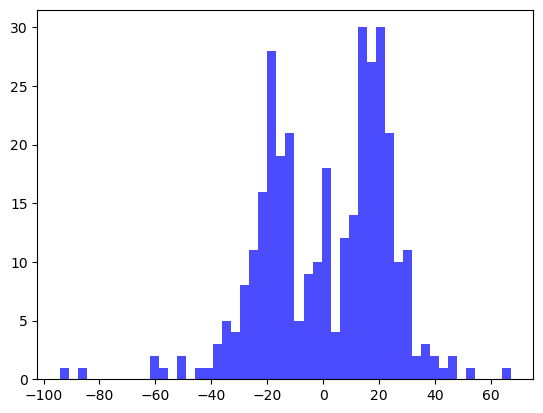

In [52]:
plt.hist(trade_profits, bins=50, color='blue', alpha=0.7)

Final returns:  4.35053798667248 %


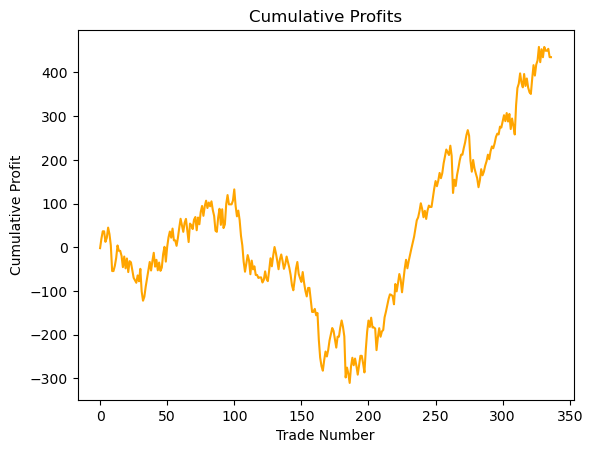

In [53]:
cumulative_profits = np.cumsum(trade_profits)
print("Final returns: ", cumulative_profits[-1]/initial_capital * 100, "%")
plt.plot(cumulative_profits, color='orange')
plt.title('Cumulative Profits')
plt.xlabel('Trade Number')
plt.ylabel('Cumulative Profit')
plt.show()

Number of trades:  338
Percentage_Return:  3.190372429367433 %


/var/folders/rc/tn2ys5g55157vhhlmn0_vfwr0000gq/T/ipykernel_31686/4177828696.py:29: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print("Percentage_Return: ", (cumulative_profit_series_no_agent[-1] / initial_capital) * 100,"%")


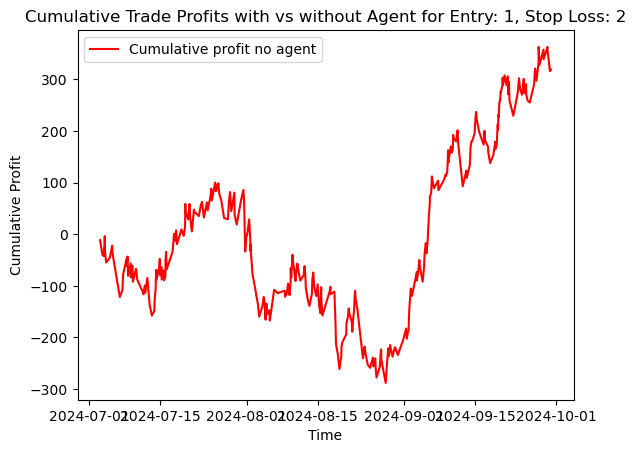

Number of trades:  149
Percentage_Return:  6.567326245546775 %


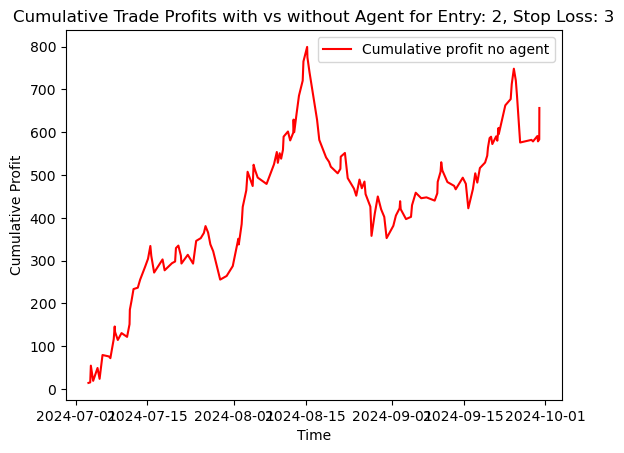

Number of trades:  51
Percentage_Return:  4.752517446850754 %


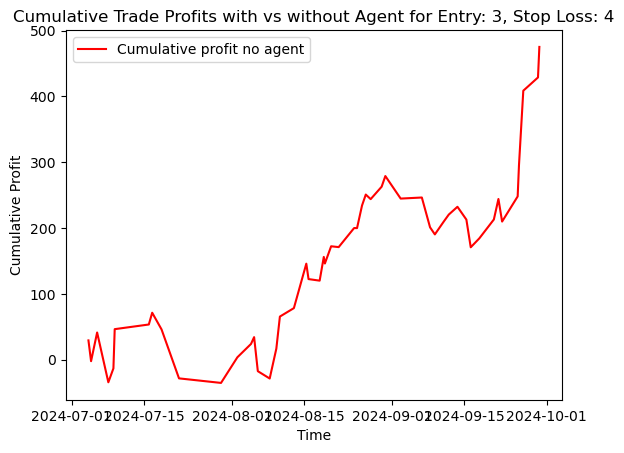

Number of trades:  8
Percentage_Return:  0.2897754513975997 %


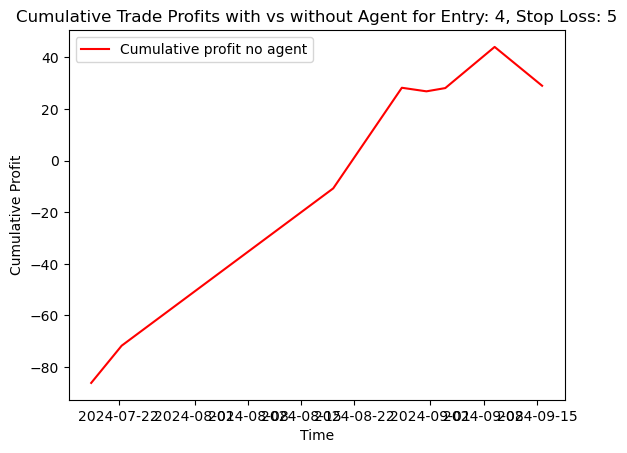

In [54]:

exit_threshold = 0
#tx_cost = 0.00025

#entry_stop_pairs = [(1, 2), (2, 3), (3, 4), (4, 5), (5, 6)]

for entry_stop_pair in entry_stop_pairs:
    entry_threshold, stop_loss_threshold = entry_stop_pair
    
    #TEST DATA
    #----------
    positions, trade_entries, trade_exits = backtest_pair_rolling(S1_test,S2_test,zscore_series_test, entry_threshold, exit_threshold, stop_loss_threshold)
    trade_profits_no_agent, net_trade_profits_S1_no_agent, net_trade_profits_S2_no_agent,cumulative_profit_series_no_agent, entry_times_no_agent, exit_times_no_agent = simulate_strategy_trade_pnl(trade_entries, trade_exits, initial_capital, beta_series_test, tx_cost)

    # #TRAIN DATA
    # #----------
    # positions, trade_entries, trade_exits = backtest_pair_rolling(S1_train,S2_train,zscore_series_train, entry_threshold, exit_threshold, stop_loss_threshold)
    # trade_profits_no_agent, net_trade_profits_S1_no_agent, net_trade_profits_S2_no_agent,cumulative_profit_series_no_agent, entry_times_no_agent, exit_times_no_agent = simulate_strategy_trade_pnl(trade_entries, trade_exits, initial_capital, beta_series_train, tx_cost)

    #VAL DATA
    #----------
    # positions, trade_entries, trade_exits = backtest_pair_rolling(S1_val,S2_val,zscore_series_val, entry_threshold, exit_threshold, stop_loss_threshold)
    # trade_profits_no_agent, net_trade_profits_S1_no_agent, net_trade_profits_S2_no_agent,cumulative_profit_series_no_agent, entry_times_no_agent, exit_times_no_agent = simulate_strategy_trade_pnl(trade_entries, trade_exits, initial_capital, beta_series_val, tx_cost)

    #print(trade_profits_no_agent)
    #cumulative_profit_series_no_agent_indexed = cumulative_profit_series_no_agent.reindex(prices_test.index, method='ffill').fillna(0)
    print("Number of trades: ", len(trade_profits_no_agent))
    #print(cumulative_profit_series_no_agent)
    plt.plot(cumulative_profit_series_no_agent, color = 'red', label = 'Cumulative profit no agent') #Cumulative profits without agent
    print("Percentage_Return: ", (cumulative_profit_series_no_agent[-1] / initial_capital) * 100,"%")
    plt.title(f'Cumulative Trade Profits with vs without Agent for Entry: {entry_threshold}, Stop Loss: {stop_loss_threshold}')
    plt.xlabel('Time')
    plt.ylabel('Cumulative Profit')
    plt.legend()
    plt.show()